# The Monte Carlo method
(a version of revised code)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import math

# further investigation

#### This part of the code is to investigate the factors that affect the brazil nut effect and the rate of size segregation. There are three parameters that need to be tested, they are particle size and weight ratio and shaking frequency.



Once the program is working, you can see
how different numbers of nuts and other particles behave, whether
it makes much difference if you have a distribution of particle sizes,
and so on. You should consider both whether the nuts rise to the
surface and how long it takes them to do so.

In [2]:
def condition1(r,M,coordinates,brazil_nut=False):
    """This is a function to check whether particle (i.e. a nut or any other bit of
    muesli) overlaps the sides or bottom of the box."""

    count =0 #
    coordinates_list = list(coordinates) #converts set into list
    found = False
    while not found and count<(len(coordinates_list)):
        count += 1
        coor = random.choice(coordinates_list)
        x = coor[0]
        y = coor[1]

        square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)}
        if(square.issubset(coordinates)):
            P1=np.array([x,y,r,M,brazil_nut])
            found = True
            coordinates -= square
            coordinates_list = list(coordinates)
            return P1
            
    else:  #if there was no space in the box
        return 0
    #P1 is a list of array contains x,y coordinate of a nut, its radius, its mass
    


In [3]:
def condition1_MC(r,M,coordinates,brazil_nut=False):
    """This is a function to check whether particle (i.e. a nut or any other bit of
    muesli) overlaps the sides or bottom of the box."""

    count =0 #
    coordinates_list = list(coordinates) #converts set into list
    found = False
    while not found and count<(len(coordinates_list)):
        count += 1
        coor = random.choice(coordinates_list)
        x = coor[0]
        y = coor[1]

        square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)}

        if(square.issubset(coordinates)):
            P1=np.array([x,y,r,M,brazil_nut])
            found = True
            return P1
    else:  #if there was no space in the box
        return 0
    #P1 is a list of array contains x,y coordinate of a nut, its radius, its mass
    


In [4]:
# This is the code for condition 3 which is
#finding the largest nearest-neighbour distance between particles 
#that is, find the shortest distance from each particle to any other particle, and then find the largest of those distances.

def LNND(data):
    """This is the code for condition 3 which is
    finding the largest nearest-neighbour distance between particles 
    that is, find the shortest distance from each particle to any other particle, 
    and then find the largest of those distances.
    """
    List = [] # A temporary list to store information of neighbour distance
    largest=np.array([]) # A list to store information of the largest nearest neighbour distance
    
    if len(data)>1:
        for i in range (len(data)): # select the first nut from the "data " list
            for j in range(len(data)): # select the second nut from the "data" list
                if i!=j: # condition for the selected 2 nuts is not the same nut
                    dx=data[i][0]-data[j][0] # find the difference in x coordinate for the two selected nuts
                    dy=data[i][1]-data[j][1] # find the difference in y coordinate for the two selected nuts
                    r = np.sqrt(dx**2+dy**2) # the absolute value of the distance difference between the two nuts
                    List.append(r) # add each calculated distance difference to the temporary list
            nearest_distance=min(List) # the nearest distance is the minimum value in the list
            largest=np.append(largest,nearest_distance) # store all of the nearest distance inside of the list called 'largest'
            #print( "the nearest distance is",nearest_distance)
            List.clear()
        LNND=max(largest) # LNND is the largest nearest neighbour distance
    else:
        print(data)
        LNND=data[0][1] # if there is one nut, its largest nearest neighbour distance is between itself and the ground
        
    return LNND


In [5]:
#box has width w, height h
D=20 # D is the width of the box
h=150# h is the hight of the box
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}
def nut(Nb,Nm,rb,rm,Mb,Mm):
    """this is a function will found the consistent position of each particle.
    Conditons: 1.particles do not overlap the sides or bottom of the box.
               2.two particles do not overlap
    
    Nb stands for the number of brazil nut
    Nm stands for the number of muesli
    rb stands for the radius of the Brazil nut
    rm stands for the radius of the muesli
    Mb stands for the mass of the brazil nut
    Mm stands for the mass of the muesli"""
    
   ########################################################################################################################## 
    particles = []

    #coordinates = [{x for x in range(0,D+1)},{y for y in range(0,h+1)}]
    
    
    while Nb != 0:
        r = rb
        new_particle = condition1(rb,Mb,coordinates,True)
        Nb -= 1
        if(type(new_particle) != type(0)):
            particles.append(new_particle)
    
    while Nm != 0:
        if type(rm) == type([]):
            r = random.choice(rm)  #many radius
        else:
            r = rm
        #r = rm    # 1 radius
        new_particle = condition1(r,Mm,coordinates)
        Nm -= 1
        if(type(new_particle) != type(0)):
            particles.append(new_particle)

    return particles # particles is the name of the final list where contains all the information of the nuts
                         # rm is the radius of the muesli


### Have a distribution of particle sizes, consider both whether the nuts rise to the surface and how long it takes them to do so.

In [6]:
def circle(b):
    """This is a function to draw the arrangement of the nuts 
    after knowing their position and radius"""
    
    theta=np.linspace(0,2*np.pi,200) #find 200 points between 0 and 2*Pi.
    xc=b[0] #x position of a nut
    yc=b[1] #y position of a nut
    r=b[2] #radius of a nut
    #These two lines are used to locate 200 x-y coordinates around one circle at the origin
    xd=r*np.cos(theta)  
    yd=r*np.sin(theta) 
    #These two lines are used to locate 200 x-y coordinates around one circle at the final position
    x=xc+xd
    y=yc+yd
    return (x,y)


In [18]:
import matplotlib.patches as patches
def plot_nut(data):
    """This is a function to plot the arrangement of nuts in a box
    """

    fig = plt.figure()
    fig,ax = plt.subplots(1)
    #print('plot')
    for a in range(len(data)): # a for loop for each nut, plot each nut later
        #print(circle(data[a]))
        ax.set_aspect(1) #the radius is equal in any direction inside of a circle
        ax=plt.gca()
        if data[a][4] == True: # plot the brazil nut if the radius of the nut is bigger than muesli
            brazilnut=plt.plot(circle(data[a])[0],circle(data[a])[1], color="brown", lw=4)# plot the brazil nut
        else:
            muesli= plt.plot(circle(data[a])[0],circle(data[a])[1], color="orange",lw=2)# plot the muesli
    box=ax.add_patch(patches.Rectangle((0, 0), D, h,color='white'))  # plot the box
    

In [19]:
g=9.81
def PE(data):
    """This is a function to find the potential energy of the system 
    which is the sum of individual nut's energy
    the potential energy equation for each nut is E=mgh"""
    E1=0 # identify potential energy whcih is 0 when there is no nut
    for i in range (0,len(data)): # find the case for each nut
        r=data[i][2] # r is the radius of the nut
        E1 += data[i][3]*g*(data[i][1]) # data[3] is the mass of the nut, 
                                          # data[i][1]-r gives the distance between ground and the botoom of the nut
    return E1 # E1 is the potential energy



# part 2

The Monte Carlo model then picks any particle at random, moves it a random distance horizontally and 
vertically, and if the move improves the energy and is physically possible (does not lead to overlaps), accepts 
it. There are several points to note.

#### • Use the largest nearest-neighbour distance to control the step length. This will help to ensure that as many as possible of the moves attempted are accepted.


In [20]:
def LNND_method(dy,dx,r,tol):
    """this is the method of the largest nearest neighbour distance"""

    if len(data)>1:
        d_12=np.sqrt((dx)**2+(dy)**2) # the shortest distance between the centre of mass of two particles
    
        if r-d_12 >= tol: # condition for the largest nearest distance larger or equal to the step length of the selected nut
            return True
        else:
            return 0
    else:
        return True

#### • The algorithm does not follow the path of a particle – the particle just "jumps", which means that it might get from A to B even though there is no passage between A and B which is wide enough. ###

#### • Particles move sideways as well as vertically – imagine this torepresent the effect of bouncing off the walls.


In [21]:
def Monte_Carlo_method(data,rb,rm,Mb,Mm,number):
    """This code will move a random selected particle to a random position. 
        The position satisfies 3 conditions:
        condition 1:the new positon of the particle will not overlap with any existing particle
        condition 2:each move will improve the potential energy of the system
        condition 3:Use the largest nearest-neighbour distance to control the step length. 
        This will help to ensure that as many as possible of the moves attempted are accepted."""
    """The function has 6 arguments, they are:
        data,this is an array of information of nuts
        rb,the radius of the brazil nut
        
        rm,the radius of the muesli
        Mb,the mass of a brazil nut
        Mm,the mass of a muesli
        number, number of iterations.(the number of times to randomly move a random selected particle.)"""

    #####################################################################################################################
    # a random selected particle will be removed and teleport to another position in the box 
    #under 3 conditons that are mentioned before
    n=0
    check_particle=0
   
    while n < number: # repeat the process to settle nuts down
        
        #pelist.append(PE(data))
        LNND(data)# find the largest nearest distance in the list 'data'
        particle_num = len(data)# total particle numbers
    #####################################################################################################################    
    #information of the selected particle

        RP_number = random.randint(0,particle_num-1) # the number of the selected nut in the "data" list
        RP_array=np.array([data[RP_number]])# the array for the selected data
        E_initial=PE(RP_array) # the potential energy of the random selected nut
        x1 = RP_array[0][0] # the x position of the selected nut
        y1 = RP_array[0][1] # the y position of the selected nut
        r1 = RP_array[0][2] # radius of the selected nut
        identifier = RP_array[0][4]

    #####################################################################################################################
    # erase the selected particle 

        del data[RP_number]# I need to store this to data1 remove one information of the randomly selected nut
    #####################################################################################################################
    # use loops to change the arrangement of nuts in the same box
    # set the largest nearest distance as the step length, reject any location which is out of the distance
    
        coordinates = {(i, j) for j in range(h+1) for i in range(D+1)}
        for particle in data:
            x = particle[0]
            y = particle[1]
            r = particle[2]
            square = {(i, j) for i in range(x-r,x+r) for j in range(y-r,y+r)}
            coordinates -= square
            
        found = 0
        r = r1
        m = RP_array[0][3]
        while not found:
            new_particle = condition1_MC(r1,m, coordinates) # the  position and radius array of a new particle 
            x2 = new_particle[0] 
            y2 = new_particle[1]
            new_particle[4] = identifier
            square = {(i, j) for i in range(x2-r,x2+r) for j in range(y2-r,y2+r)}
            E_final=PE(np.array([new_particle]))# the potential energy of the new nut
            #print(1)
            if E_initial-E_final>=0: # improve the potential energy of the system 
                if len(data)>=1: # the largest nearest neighbour distance require 2 nuts minimum.
                                # by losing one nut, the amount of nut shoulbe be greater and equal to 1 for the condition to apply
                    for particle in data:# the previous nut in the list, note:the identity of the nut is not identified
                        # x,y,r stands for the x,y coordinate and radius of the nut
                        x3 = particle[0] 
                        y3 = particle[1]
                        #print(2)

                        if LNND_method(abs(y2-y1),abs(x2-x1),LNND(data)*15,1e-6):# make sure the step length of the new particle 
                                                                                # matches the largest nearest distance
                                check_particle+=1# add up checked particles
                                
                    if check_particle==len(data):   # the new nut does not overlap with any existed nuts
                        data.insert(RP_number,new_particle) # the consistent new particle will be add to the final list 
                        check_particle=0# set the temporary particle list to empty
                        coordinates -= square
                        found = True
                        break


                else:
                    data.insert(RP_number,new_particle)
                    found = True
                    break
        n+=1
    return data



# brazil nut effect after shaking

In [22]:
def shake(settled_particle):
    """This is a function to shake the nut in the box after settling them 
    shaking means multiplying the vertical component of each nut by 2"""
    #print('shake it')
    for i in settled_particle:
        i[1]=i[1]*2 # multiply the y coordinate of all the nuts by 2 to simulate the effect of shaking
    
    return settled_particle

In [32]:
def Brazil_nut_effect_energy(data,shake_times):
    """This is the code for brazil nut effect after shaking the container
    The code terminates when the energy change of the system is insignificant"""
    n=1
    while n<=shake_times:
        initial_energy = PE(data)
        data = Monte_Carlo_method(data,2,1,2,1,1)
        energy = PE(data)
        while initial_energy > energy: # stop iterations if the change of potential energy is insignificant
            initial_energy = energy
            data = Monte_Carlo_method(data,2,1,2,1,500) # use Monte Carlo method to settle particles
            energy = PE(data)
            #print(energy,initial_energy)
        #print("done")
        plot_nut(data) #plot the settled paricles
        settled_particle = shake(data)
        n+=1

In [33]:
def Brazil_nut_effect_height(data,shake_times):
    """This is the code for brazil nut effect after shaking the container
    The code terminates when the brazil nut flow up to the surface"""
    n=1
    while n<=shake_times:
        settled_particle = Monte_Carlo_method(data,2,1,2,1,500)
        plot_nut(settled_particle)
        settled_particle = shake(settled_particle)
        n+=1
        heights = []
        for particle in data:
            if particle[4] == True:
                brazil_y = particle[1]
            else:
                heights.append(particle[1])
        if max(heights) <= brazil_y:
            print("It's at the top after", n, "times")
            break
        

####  segregation of a binary system. Radius ratio between muesli and Brazil nuts is 1:2 

plot


<Figure size 432x288 with 0 Axes>

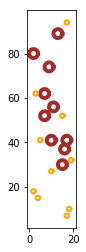

In [34]:
h= 100 #height of the box
D= 20  #width of the box
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)} #coordinates of the system
data=nut(10,10,2,1,2,1)# data has 6 arguments, they are numbers of brazil nut and particles, radius of nuts and particles,their mass
plot_nut(data) #plot the arrangement


plot
shake it
plot
shake it


<Figure size 432x288 with 0 Axes>

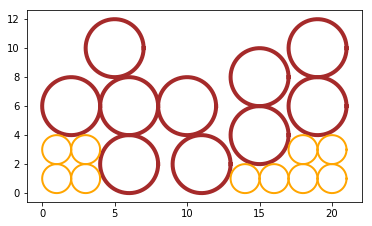

<Figure size 432x288 with 0 Axes>

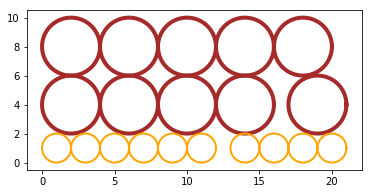

In [35]:
Brazil_nut_effect_energy(data,10)

#### One Brazil nut with radius 3 and twenty muesli with random size in the range of 2 to 4. Each” shake” has 500 “jumps”. Lifting constant is 2.

plot


<Figure size 432x288 with 0 Axes>

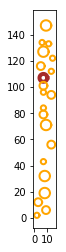

In [28]:
h= 150 #height of the box
D= 15  #width of the box
coordinates = {(i, j) for j in range(h+1) for i in range(D+1)} #coordinates of the system
data=nut(1,20,3,[2,3,4],2,1)# data has 6 arguments, they are numbers of brazil nut and particles, radius of nuts and particles,their mass
plot_nut(data) #plot the arrangement


plot
shake it
plot
shake it


<Figure size 432x288 with 0 Axes>

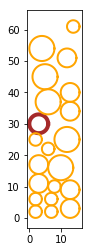

<Figure size 432x288 with 0 Axes>

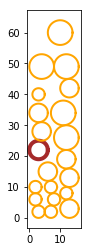

In [29]:
Brazil_nut_effect_height(data,2)